In [1]:
import re
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import nltk
import numpy as np
from google.colab import drive
import pickle
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
with open(Path('/content/drive/My Drive/scriptie/clean_corpus_archive_asylum.txt-without-clean-module-19-01.pkl'), 'rb') as f:
    df_text = pickle.load(f)

In [3]:
df_text.head(-1)

,id,text,clean_text,url,Case title:,Appellant name:,Status of case:,Hearing date:,Promulgation date:,Publication date:,Last updated on:,Country:,Judges:,Categories:,Keywords
0,/utiac/jr-00493-2021,/utiac/jr-00493-2021In the Upper Tribunal(Immi...,held on 25-27 january 2022and upon the respond...,https://moj-tribunals-documents-prod.s3.amazon...,,,Unreported,27 Jan 2022,22 Feb 2022,28 Feb 2022,28 Feb 2022,,,NaN,NaN
1,/utiac/jr-00493-2021,/utiac/jr-00493-2021In the Upper Tribunal(Immi...,held on 25-27 january 2022and upon the respond...,https://moj-tribunals-documents-prod.s3.amazon...,,,Unreported,27 Jan 2022,22 Feb 2022,28 Feb 2022,28 Feb 2022,,,NaN,NaN
2,/utiac/hu-14019-2019,/utiac/hu-14019-2019Upper Tribunal(Immigration...,this is an appeal by the secretary of state. f...,https://moj-tribunals-documents-prod.s3.amazon...,,,Unreported,19 Jan 2022,14 Feb 2022,1 Mar 2022,1 Mar 2022,,,NaN,NaN
3,/utiac/hu-14019-2019,/utiac/hu-14019-2019Upper Tribunal(Immigration...,this is an appeal by the secretary of state. f...,https://moj-tribunals-documents-prod.s3.amazon...,,,Unreported,19 Jan 2022,14 Feb 2022,1 Mar 2022,1 Mar 2022,,,NaN,NaN
4,/utiac/hu-04812-2020,/utiac/hu-04812-2020Upper Tribunal(Immigration...,this is an appeal of the secretary of state bu...,https://moj-tribunals-documents-prod.s3.amazon...,,,Unreported,19 Jan 2022,14 Feb 2022,1 Mar 2022,1 Mar 2022,,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23572,/utiac/ea-01346-2020,/utiac/ea-01346-2020Upper Tribunal(Immigration...,this is an appeal against a decision of first-...,https://moj-tribunals-documents-prod.s3.amazon...,,,Unreported,21 Dec 2021,24 Feb 2022,14 Mar 2022,14 Mar 2022,,,NaN,NaN
23573,/utiac/pa-13880-2017-pa-02198-2020,/utiac/pa-13880-2017-pa-02198-2020Upper Tribun...,i shall refer to the appellant as the responde...,https://moj-tribunals-documents-prod.s3.amazon...,,,Unreported,18 Jan 2022,23 Feb 2022,14 Mar 2022,14 Mar 2022,,,NaN,NaN
23574,/utiac/pa-01983-2018,/utiac/pa-01983-2018Upper Tribunal(Immigration...,nonymity orderpursuant to rule 14 of the tribu...,https://moj-tribunals-documents-prod.s3.amazon...,,,Unreported,8 Nov 2021,23 Feb 2022,14 Mar 2022,14 Mar 2022,,,NaN,NaN
23575,/utiac/pa-00252-2020,/utiac/pa-00252-2020Upper Tribunal(Immigration...,"by a decision promulgated on 25 may 2021, the ...",https://moj-tribunals-documents-prod.s3.amazon...,,,Unreported,17 Nov 2021,23 Feb 2022,14 Mar 2022,14 Mar 2022,,,NaN,NaN


In [4]:
df_clean =df_text.drop(columns=['id', 'text', 'url','Case title:', 'Appellant name:', 'Status of case:', 'Hearing date:', 'Promulgation date:', 'Last updated on:','Country:', 'Judges:', 'Categories:', 'Keywords'])


In [5]:
df_clean.head(-1)

,clean_text,Publication date:
0,held on 25-27 january 2022and upon the respond...,28 Feb 2022
1,held on 25-27 january 2022and upon the respond...,28 Feb 2022
2,this is an appeal by the secretary of state. f...,1 Mar 2022
3,this is an appeal by the secretary of state. f...,1 Mar 2022
4,this is an appeal of the secretary of state bu...,1 Mar 2022
...,...,...
23572,this is an appeal against a decision of first-...,14 Mar 2022
23573,i shall refer to the appellant as the responde...,14 Mar 2022
23574,nonymity orderpursuant to rule 14 of the tribu...,14 Mar 2022
23575,"by a decision promulgated on 25 may 2021, the ...",14 Mar 2022


In [6]:
#df_clean=df_clean.fillna(method="ffill")
df_clean = df_clean.replace(r'^\s*$', np.nan, regex=True)
df_clean=df_clean.dropna()
df_clean.head(-1)

,clean_text,Publication date:
0,held on 25-27 january 2022and upon the respond...,28 Feb 2022
1,held on 25-27 january 2022and upon the respond...,28 Feb 2022
2,this is an appeal by the secretary of state. f...,1 Mar 2022
3,this is an appeal by the secretary of state. f...,1 Mar 2022
4,this is an appeal of the secretary of state bu...,1 Mar 2022
...,...,...
23572,this is an appeal against a decision of first-...,14 Mar 2022
23573,i shall refer to the appellant as the responde...,14 Mar 2022
23574,nonymity orderpursuant to rule 14 of the tribu...,14 Mar 2022
23575,"by a decision promulgated on 25 may 2021, the ...",14 Mar 2022


In [7]:

years=[]
column_number = -1

for column in df_clean['Publication date:']:
  column_number+=1
  split=column.split(' ')
  c=0
  date=[]
  for i in split:
    if i !='':
      date.append(i)
  years.append(int(date[2]))

In [8]:
df_clean.insert(1, "year", years, True)

In [9]:
df_clean.head()

,clean_text,year,Publication date:
0,held on 25-27 january 2022and upon the respond...,2022,28 Feb 2022
1,held on 25-27 january 2022and upon the respond...,2022,28 Feb 2022
2,this is an appeal by the secretary of state. f...,2022,1 Mar 2022
3,this is an appeal by the secretary of state. f...,2022,1 Mar 2022
4,this is an appeal of the secretary of state bu...,2022,1 Mar 2022


In [10]:
df_clean=df_clean.drop(columns='Publication date:')

In [11]:
df_clean = df_clean[df_clean.year != 2023]

In [12]:
df_clean.head()

,clean_text,year
0,held on 25-27 january 2022and upon the respond...,2022
1,held on 25-27 january 2022and upon the respond...,2022
2,this is an appeal by the secretary of state. f...,2022
3,this is an appeal by the secretary of state. f...,2022
4,this is an appeal of the secretary of state bu...,2022


In [13]:
df_clean=df_clean.sort_values(by=['year'])

In [14]:
df_clean.head()

,clean_text,year
21812,this is an appeal by the entry clearance offic...,2013
21843,the appellant is a citizen of ethiopia who was...,2013
21844,this is the determination of the upper tribuna...,2013
21845,the appellant is a citizen of sri lanka born o...,2013
21846,"upper tribunal) rules 2008, the appellant has ...",2013


In [15]:
number_of_documents=(df_clean['year'].value_counts(sort=False))
print(number_of_documents)
print(405+1744+3136+2053+3889+2980+2987+2277+1952+1916)

2013     405
2014    1744
2015    3136
2016    2053
2017    3889
2018    2980
2019    2987
2020    2277
2021    1952
2022    1916
Name: year, dtype: int64
23339


Text(0, 0.5, 'Number of documents')

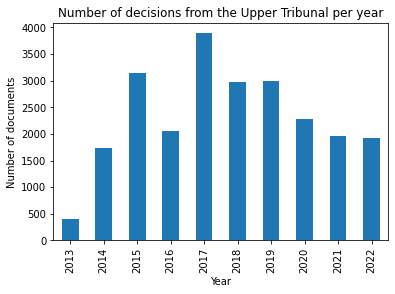

In [16]:
ax = number_of_documents.plot.bar(title='Number of decisions from the Upper Tribunal per year')
ax.set_xlabel("Year")
ax.set_ylabel("Number of documents")


In [17]:
df_13 = df_clean[df_clean['year']==2013]
df_14 = df_clean[df_clean['year']==2014]
df_15 = df_clean[df_clean['year']==2015]
df_16 = df_clean[df_clean['year']==2016]
df_17 = df_clean[df_clean['year']==2017]
df_18 = df_clean[df_clean['year']==2018]
df_19 = df_clean[df_clean['year']==2019]
df_20 = df_clean[df_clean['year']==2020]
df_21 = df_clean[df_clean['year']==2021]
df_22 = df_clean[df_clean['year']==2022]

In [18]:
def get_social(dataframe_corpus):
  facebook_mentioned=0
  viber_mentioned=0
  youtube_mentioned=0
  whatsapp_mentioned=0
  telegram_mentioned=0
  instagram_mentioned=0
  twitter_mentioned=0
  corpus=dataframe_corpus['clean_text'].sum()
  year= dataframe_corpus['year'].iloc[0]
  txt= []
  sentence_list=[]
  sentences=corpus.split('.')
  counter=-1
  for sentence in sentences:
    counter+=1
    for word in sentence.split(' '):
      if word =='facebook':
        a= sentences[counter -5] +' '+ sentences[counter-4]+' '+ sentences[counter-3]+' '+ sentences[counter-2]+' '+ sentences[counter-1]+' '+sentences[counter] +' '+ sentences[counter+1]+' '+ sentences[counter+2]+' '+ sentences[counter+3]+' '+ sentences[counter+4]+' '+ sentences[counter+5]       
        txt.append(a)
        facebook_mentioned+=1 
      if word == 'viber':
        b=sentences[counter -5] +' '+ sentences[counter-4]+' '+ sentences[counter-3]+' '+ sentences[counter-2]+' '+ sentences[counter-1]+' '+sentences[counter] +' '+ sentences[counter+1]+' '+ sentences[counter+2]+' '+ sentences[counter+3]+' '+ sentences[counter+4]+' '+ sentences[counter+5] 
        txt.append(b)
        viber_mentioned+=1
      if word == 'youtube':
        c=sentences[counter -5] +' '+ sentences[counter-4]+' '+ sentences[counter-3]+' '+ sentences[counter-2]+' '+ sentences[counter-1]+' '+sentences[counter] +' '+ sentences[counter+1]+' '+ sentences[counter+2]+' '+ sentences[counter+3]+' '+ sentences[counter+4]+' '+ sentences[counter+5] 
        txt.append(c)
        youtube_mentioned+=1
      if word == 'whatsapp':
        d=sentences[counter -5] +' '+ sentences[counter-4]+' '+ sentences[counter-3]+' '+ sentences[counter-2]+' '+ sentences[counter-1]+' '+sentences[counter] +' '+ sentences[counter+1]+' '+ sentences[counter+2]+' '+ sentences[counter+3]+' '+ sentences[counter+4]+' '+ sentences[counter+5] 
        txt.append(d)
        whatsapp_mentioned+=1
      if word == 'telegram':
        e=sentences[counter -5] +' '+ sentences[counter-4]+' '+ sentences[counter-3]+' '+ sentences[counter-2]+' '+ sentences[counter-1]+' '+sentences[counter] +' '+ sentences[counter+1]+' '+ sentences[counter+2]+' '+ sentences[counter+3]+' '+ sentences[counter+4]+' '+ sentences[counter+5] 
        txt.append(e)
        telegram_mentioned+=1
      if word == 'instagram':
        f=sentences[counter -5] +' '+ sentences[counter-4]+' '+ sentences[counter-3]+' '+ sentences[counter-2]+' '+ sentences[counter-1]+' '+sentences[counter] +' '+ sentences[counter+1]+' '+ sentences[counter+2]+' '+ sentences[counter+3]+' '+ sentences[counter+4]+' '+ sentences[counter+5] 
        txt.append(f)
        instagram_mentioned+=1
      if word == 'twitter':
        g=sentences[counter -5] +' '+ sentences[counter-4]+' '+ sentences[counter-3]+' '+ sentences[counter-2]+' '+ sentences[counter-1]+' '+sentences[counter] +' '+ sentences[counter+1]+' '+ sentences[counter+2]+' '+ sentences[counter+3]+' '+ sentences[counter+4]+' '+ sentences[counter+5] 
        txt.append(g)
        twitter_mentioned+=1 
  txt = [*set(txt)]
  data = {year: [facebook_mentioned, viber_mentioned, youtube_mentioned,whatsapp_mentioned,telegram_mentioned,instagram_mentioned,twitter_mentioned]}   
  series = pd.DataFrame(data=data,index = ["facebook", "viber", "youtube",'whatsapp','telegram','instagram','twitter'])
  social=pd.DataFrame(txt,columns=['text'])
  social.insert(1,'year',year) 
  return social,series

In [19]:
social_mentioned_13=get_social(df_13)[1]
social_mentioned_14=get_social(df_14)[1]
social_mentioned_15=get_social(df_15)[1]
social_mentioned_16=get_social(df_16)[1]
social_mentioned_17=get_social(df_17)[1]
social_mentioned_18=get_social(df_18)[1]
social_mentioned_19=get_social(df_19)[1]
social_mentioned_20=get_social(df_20)[1]
social_mentioned_21=get_social(df_21)[1]
social_mentioned_22=get_social(df_22)[1]

In [20]:
social_media_per_year= pd.concat([social_mentioned_13,social_mentioned_14,social_mentioned_15,social_mentioned_16,social_mentioned_17,social_mentioned_18,social_mentioned_19,social_mentioned_20,social_mentioned_21,social_mentioned_22], axis=1)
social_media_per_year.head(-1)

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
facebook,39,115,87,67,537,405,828,669,838,1484
viber,0,1,8,1,32,16,6,14,36,7
youtube,6,29,9,7,38,33,37,21,19,22
whatsapp,0,0,7,4,30,59,90,97,175,119
telegram,0,0,0,0,0,7,1,2,1,0
instagram,0,0,0,0,1,11,3,11,26,14


In [21]:
trans=social_media_per_year.T
trans.head()

,facebook,viber,youtube,whatsapp,telegram,instagram,twitter
2013,39,0,6,0,0,0,0
2014,115,1,29,0,0,0,0
2015,87,8,9,7,0,0,11
2016,67,1,7,4,0,0,5
2017,537,32,38,30,0,1,15


Text(0, 0.5, 'Social media platforms mentioned')

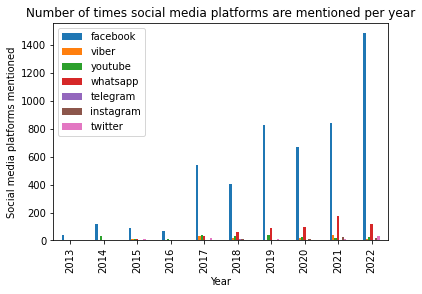

In [22]:
soc = trans.plot.bar(title='Number of times social media platforms are mentioned per year')
soc.set_xlabel("Year")
soc.set_ylabel("Social media platforms mentioned")


In [23]:
social_13=get_social(df_13)[0]
social_14=get_social(df_14)[0]
social_15=get_social(df_15)[0]
social_16=get_social(df_16)[0]
social_17=get_social(df_17)[0]
social_18=get_social(df_18)[0]
social_19=get_social(df_19)[0]
social_20=get_social(df_20)[0]
social_21=get_social(df_21)[0]
social_22=get_social(df_22)[0]
frames=[social_13, social_14,social_15,social_16,social_17,social_18,social_19,social_20,social_21,social_22]
df_social= pd.concat(frames)

In [24]:
df_social.head(-1)

,text,year
0,the appellant said he had one friend who came...,2013
1,given the findings of the judge that the appe...,2013
2,26) the appellant was asked if he would practi...,2013
3,it appears that since the events of february/...,2013
4,he submitted that the appellant's past persec...,2013
...,...,...
1213,he submits that the fttj confined his assessm...,2022
1214,the findings made establish he is of no under...,2022
1215,the question is whether content of the appell...,2022
1216,mr schwenk invited me to find that there was ...,2022


In [26]:
df_social.text.to_csv('/content/drive/My Drive/scriptie/df_text.tsv', sep="\t")

In [27]:
df_social.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5159 entries, 0 to 1218
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5159 non-null   object
 1   year    5159 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB
